In [ ]:
import tensorflow
tensorflow.__version__

'2.8.0'

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
from datetime import datetime

In [ ]:
# skimage.filters.thresholding.threshold_isodata
# skimage.filters.thresholding.threshold_li
# skimage.filters.thresholding.threshold_mean
# skimage.filters.thresholding.threshold_minimum
# skimage.filters.thresholding.threshold_otsu     <------------------------
# skimage.filters.thresholding.threshold_triangle
# skimage.filters.thresholding.threshold_yen
# skimage.filters.thresholding.threshold_local    <------------------------
####################################################local
# filters.threshold_local(
#     image,
#     block_size,
#     method='gaussian',
#     offset=0,
#     mode='reflect',
#     param=None,
#     cval=0,
# )
# from skimage import filters
# local_thresh = filters.threshold_local(image = X_train[0].reshape(28, 28), 
#                                        block_size = 5, 
#                                        offset = 1 )
# print(local_thresh.shape)
# binary = X_train[0].reshape(28, 28) > local_thresh
# plt.imshow(binary, cmap='gray')
# plt.show()
#####################################################global
# from skimage.filters import threshold_otsu
# otsu_value = threshold_otsu(andy)
# print(otsu_value)
# otus_andy = andy > otsu_value
# plt.imshow(otus_andy, cmap='gray')
# plt.show()

In [ ]:
# 參考 單筆數據 進行 thresholding 處理
# import matplotlib.pyplot as plt
# plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
# plt.show()
# binary = X_train[0].reshape(28, 28) > (100) # <---------可以參考以上可能方式讓模型更精準
# plt.imshow(binary, cmap='gray')
# plt.show()

100%|██████████| 10000/10000 [00:00<00:00, 12679.43it/s]


(60000, 28, 28) (10000, 28, 28)


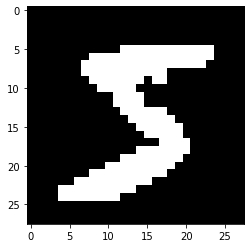

In [ ]:
# 重新載入資料
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 首次處理針對 X_train, X_test
X_train_binary, X_test_binary = [], []
from skimage.filters import thresholding# .threshold_otsu
from tqdm import tqdm
for i in tqdm(range(X_train.shape[0])):
    thresh = thresholding.threshold_yen(X_train[i]) #, block_size=5
    binary = X_train[i] > thresh
    X_train_binary.append(binary)

for i in tqdm(range(X_test.shape[0])):
    thresh = thresholding.threshold_otsu(X_test[i])
    binary = X_test[i] > thresh
    X_test_binary.append(binary)    

# 數據二次處理
X_train, X_test = np.array(X_train_binary), np.array(X_test_binary)
print(X_train.shape, X_test.shape    )
# 顯示
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255.0 # <------------還需要處理?!
x_Test_norm = X_test_2D/255.0

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=800, verbose=2)  

Epoch 1/10
60/60 - 1s - loss: 2.2840 - accuracy: 0.2749 - val_loss: 2.2488 - val_accuracy: 0.4232 - 1s/epoch - 17ms/step
Epoch 2/10
60/60 - 1s - loss: 2.1746 - accuracy: 0.4743 - val_loss: 2.0705 - val_accuracy: 0.5522 - 559ms/epoch - 9ms/step
Epoch 3/10
60/60 - 1s - loss: 1.9461 - accuracy: 0.5646 - val_loss: 1.7962 - val_accuracy: 0.6130 - 544ms/epoch - 9ms/step
Epoch 4/10
60/60 - 1s - loss: 1.6686 - accuracy: 0.6394 - val_loss: 1.5170 - val_accuracy: 0.6852 - 536ms/epoch - 9ms/step
Epoch 5/10
60/60 - 1s - loss: 1.4168 - accuracy: 0.6938 - val_loss: 1.2858 - val_accuracy: 0.7343 - 552ms/epoch - 9ms/step
Epoch 6/10
60/60 - 1s - loss: 1.2161 - accuracy: 0.7412 - val_loss: 1.1061 - val_accuracy: 0.7742 - 546ms/epoch - 9ms/step
Epoch 7/10
60/60 - 1s - loss: 1.0625 - accuracy: 0.7688 - val_loss: 0.9694 - val_accuracy: 0.7997 - 558ms/epoch - 9ms/step
Epoch 8/10
60/60 - 1s - loss: 0.9434 - accuracy: 0.7902 - val_loss: 0.8619 - val_accuracy: 0.8208 - 552ms/epoch - 9ms/step
Epoch 9/10
60/60 -

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.8440 - accuracy: 0.8051

	[Info] Accuracy of testing data = 80.5%


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 5s 3ms/step - loss: 0.7326 - accuracy: 0.8303

	[Info] Accuracy of training data = 83.0%


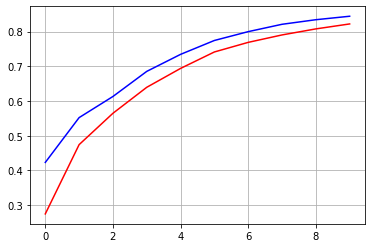

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

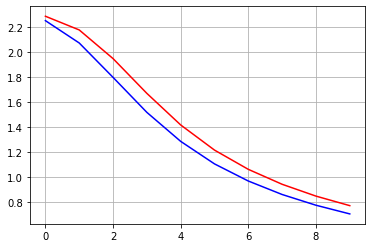

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()